In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import os
from keras.regularizers import l2
import tensorflow as tf
import time
import datetime
import argparse
import datetime
import socket
import keras 
from sklearn import preprocessing
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
##### For one-hot label
from keras.utils import np_utils


/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [3]:
# pip install -U scikit-learn


In [ ]:
nb_classes = 397
img_depth = 3
data_dir ='/content/drive/My Drive/Colab Notebooks/SUN_Practice/'+'SUN397'
train_img_file = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Training_01.txt'   # Training_01.txt
test_img_file = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Testing_01.txt'     # Testing_01.txt
classes_name_list = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/ClassName.txt'
train_label_file ='/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/ClassName.txt'
test_label_file = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/ClassName.txt'

train_img_file_path='/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Training_01.txt'
test_img_file_path='/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Testing_01.txt'


In [ ]:
print(train_img_file)

In [ ]:
print('Begin to create a map to tansfer the str label to int label...')
class_name_file =  classes_name_list
class_str = [str(line.strip()) for line in open(class_name_file).readlines()]
class_count = len(class_str)
print('%d class names are loaded' % class_count)
        # begin to create the map
le = preprocessing.LabelEncoder()
le.fit(class_str)
print(list(le.classes_))
print('Label map created...')


In [ ]:
x_train=[]

x_test=[]

x_train = np.array(x_train)

x_test = np.array(x_test)


In [ ]:
x_train.shape

# **load training data**

In [ ]:
print('\nBegin to load training data...\n')
desired_img_dim=224
print('Loading image file %s' % train_img_file_path)


In [ ]:
start_time_ = time.time()
train_img_file_path = [str(line.strip()) for line in open(train_img_file_path).readlines()]  # read all the image file name
nb_sample = len(train_img_file_path)
print('Image count: %d' % nb_sample)

data_resized_holder = np.empty([nb_sample, desired_img_dim, desired_img_dim, img_depth], dtype='float32')

for idx in range(nb_sample):
    img_file1 = train_img_file_path[idx].replace("\\", "/")     # the image file path
    # print(str(img_file1))
    # 1. read the image
    img1 = image.load_img(data_dir+img_file1)

    # 2. resize
    img1 = img1.resize((desired_img_dim, desired_img_dim), resample=0)


    # 6. give to the holder
    data_resized_holder[idx] = img1
    if(idx % 1000==0):
        print('%d image loaded.' % idx)

print('\nImage file loaded, the shape is ' + str(data_resized_holder.shape))


In [ ]:
x_train.shape

**loading the training labels text**

In [ ]:
one_hot = True
print('Loading label file %s' % train_label_file)
label_str = [str(line.strip()) for line in open(train_label_file).readlines()]
nb_unique = len(label_str)
labels_unique = le.transform(label_str)
# print(labels_unique)
labels_holder = np.hstack((  [ labels_unique[i] ] * 50 for i in range(nb_unique)))
# print(labels_holder)
nb_sample = len(labels_holder)
if one_hot == True:
    labels = np.array([[float(i == l) for i in range(nb_classes)] for l in labels_holder])
else:
    labels = labels_holder
print('Labels loaded, shape is:' + str(labels.shape))



**loading training data**

In [ ]:
x_train, nb_train_sample_1 = data_resized_holder, nb_sample

In [ ]:
y_train, nb_train_sample_2 = labels, nb_sample

In [ ]:
del data_resized_holder
del labels

In [ ]:
x_train.shape

In [ ]:
y_train.shape

# **Saving train data and test data**

**Saving x_train y_train as .npy  file**

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/x_tain.npy',x_train)

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/y_train.npy',y_train)

In [ ]:
del x_train
#del y_train


# **loading testing data**

**load testing data**

In [ ]:
print('Loading image file %s' % test_img_file_path )
start_time_ = time.time()
test_img_file_path = [str(line.strip()) for line in open(test_img_file_path).readlines()]  # read all the image file name
nb_sample = len(test_img_file_path)
print('Image count: %d' % nb_sample)

data_resized_holder = np.empty([nb_sample, desired_img_dim, desired_img_dim, img_depth], dtype='float32')

for idx in range(nb_sample):
    img_file1 = data_dir + test_img_file_path[idx].replace("\\", "/")     # the image file path
    # print(str(img_file1))
    # 1. read the image
    img1 = image.load_img(img_file1)

    # 2. resize
    img1 = img1.resize((desired_img_dim, desired_img_dim), resample=0)


    # 6. give to the holder
    data_resized_holder[idx] = img1
    if(idx % 1000==0):
        print('%d image loaded.' % idx)

print('\nImage file loaded, the shape is ' + str(data_resized_holder.shape))



**Load test labels**

In [ ]:
one_hot = True
# loading the training labels
print('Loading label file %s' % test_label_file)
label_str = [str(line.strip()) for line in open(test_label_file).readlines()]
nb_unique = len(label_str)
labels_unique = le.transform(label_str)
# print(labels_unique)
labels_holder = np.hstack((  [ labels_unique[i] ] * 50 for i in range(nb_unique)))
# print(labels_holder)
nb_sample = len(labels_holder)
if one_hot == True:
    labels = np.array([[float(i == l) for i in range(nb_classes)] for l in labels_holder])
else:
    labels = labels_holder
print('Labels loaded, shape is:' + str(labels.shape))



In [ ]:
x_test, nb_test_sample_1 = data_resized_holder, nb_sample

In [ ]:
y_test, nb_test_sample_2 = labels, nb_sample

In [ ]:
del data_resized_holder
del labels

**Saving x_test y_test .npy file**

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/x_test.npy',x_test)

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/y_test.npy',y_test)

In [ ]:
del x_test
del y_test

In [ ]:
y_test.shape

# **Load train data and test data**

**Load train data**

In [4]:
x_train = np.load('/root/Code_GCP/SUN_Practice/x_tain.npy')

In [5]:
y_train = np.load('/root/Code_GCP/SUN_Practice/y_train.npy')

In [6]:
x_train.shape

(19850, 224, 224, 3)

In [7]:
print(y_train.shape)

(19850, 397)


**Load test data**

In [8]:
x_test = np.load('/root/Code_GCP/SUN_Practice/x_test.npy')

In [9]:
y_test = np.load('/root/Code_GCP/SUN_Practice/y_test.npy')

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19850, 224, 224, 3)
(19850, 397)
(19850, 224, 224, 3)
(19850, 397)


In [11]:
!/opt/bin/nvidia-smi

/bin/sh: 1: /opt/bin/nvidia-smi: not found


# **Data Auguation**

In [ ]:
generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


## Set data to one-hot encoded format (vector of 397 class binary values)

In [ ]:
# import keras

# y_train = keras.utils.to_categorical(y_train, 397)
# y_test = keras.utils.to_categorical(y_test, 397)

In [11]:
from tensorflow.keras.applications.vgg16 import preprocess_input

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
# x_train /= 255
# x_test /= 255

In [ ]:
y_train.shape

# **Using VGG16 Pre-trained model based imagnet train this dataset**

In [ ]:
import os
import keras
from keras.models import Model
from keras.layers import Dense,Flatten,Dropout
from keras import datasets
from keras.applications.vgg16 import VGG16
#from vgg16_places_365 import VGG16_Places365 
from keras.optimizers import SGD, Adam
from keras import optimizers
from keras.callbacks import EarlyStopping


In [20]:
dim=224
num_classes=397

In [ ]:
model_sun_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(dim, dim, 3))

for layer in model_sun_vgg.layers:
    layer.trainable = False
    
model = Flatten()(model_sun_vgg.output)
# model.add(layers.BatchNormalization())
#keras.layers.normalization.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model = Dense(4096, activation="relu")(model)
model = Dense(1000, activation="relu")(model)
model = Dense(1000, activation="relu")(model)
model = Dropout(0.3)(model)
model = Dense(num_classes, activation="softmax")(model)
model_pretrain_vgg = Model(model_sun_vgg.input, model, name='model_pretrain_vgg')
model_pretrain_vgg.summary()


In [ ]:
from keras import optimizers
from keras.callbacks import EarlyStopping


In [ ]:
def learning_rate_schedule(epoch):
    if epoch <= 10:
        return 1e-4 # 0.00001
    elif epoch <= 20:
        return 1e-5
    elif epoch <= 30:
        return 1e-6
    else:
        return 1e-7
    return LR

In [ ]:
#learning_rate = 0.05
# batch_size=64
# Epoch = 10
# decay_rate = learning_rate / Epoch
# momentum = 0.9
# #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# # sgd=SGD(lr=0.05,decay=1e-5)
# #opt= Adam(lr=0.01)


In [ ]:
model_pretrain_vgg.save_weights('model_sun_initial.h5')

In [ ]:
batch_size = 128
training_runs = []
for i in range(3):
    #model_updated.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  

    model_pretrain_vgg.compile(loss='mean_squared_error', optimizer=optimizers.adam(lr=0.0001), metrics=['accuracy'])
    keras.callbacks.LearningRateScheduler(learning_rate_schedule)

#     history = model_pretrain_vgg.fit_generator(generator.flow(x_train, y_train, batch_size=batch_size),
#                     steps_per_epoch=len(x_train) / batch_size, 
#                     epochs=10,
#                     verbose=1,
#                     shuffle=True ,
#                     validation_data=(x_test, y_test))
    history = model_pretrain_vgg.fit(
    x_train, y_train,
    batch_size=128, shuffle=True, epochs=10,
    validation_data=(x_test, y_test)
    )

   
    training_runs.append(history)
    model_pretrain_vgg.get_weights()
    if i == 2:
        model_pretrain_vgg.save_weights('model1.h5')
    else:
        model_pretrain_vgg.load_weights('model_sun_initial.h5')
    print()

In [ ]:
import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
tf.__version__
tf.test.is_gpu_available()

In [ ]:
#hist = pretrain_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = Epoch, batch_size = 10)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 3, 1)
plt.plot(training_runs[0].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 2)
plt.plot(training_runs[1].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 3)
plt.plot(training_runs[2].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 4)
plt.plot(training_runs[0].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 5)
plt.plot(training_runs[1].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 6)
plt.plot(training_runs[2].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.tight_layout() 

plt.show()



In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
print("Average training accuracy: {}".format(np.mean([training_runs[0].history['acc'][-1], 
                                                     training_runs[1].history['acc'][-1], training_runs[2].history['acc'][-1]])))
print("Average testing accuracy: {}".format(np.mean([training_runs[0].history['val_acc'][-1], 
                                                     training_runs[1].history['val_acc'][-1], training_runs[2].history['val_acc'][-1]])))

In [ ]:
# loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', loss)
# print('Test accuracy:', accuracy)

# VGG16 Pre-trian model based on Places365

In [12]:
import vgg16_places_365

In [13]:
from keras import backend as K
from keras.layers import Input
from keras.layers.core import Activation, Dense, Flatten
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.layers import Conv2D
from keras.regularizers import l2
from keras.layers.core import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs
from keras.utils.data_utils import get_file
from keras.utils import layer_utils
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from urllib.request import urlopen
import numpy as np
from PIL import Image
from cv2 import resize

In [14]:
WEIGHTS_PATH = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-places365_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/GKalliatakis/Keras-VGG16-places365/releases/download/v1.0/vgg16-places365_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [15]:
from vgg16_places_365 import VGG16_Places365

In [16]:
model_places365 = VGG16_Places365(include_top=False, 
                                  weights='places',
                                  input_tensor=None, 
                                  input_shape=(224,224,3),
                                  pooling=None,
                                  classes=365
                                 )


In [17]:
model_places365.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
for layer in model_places365.layers:
    layer.trainable = False
    
model = Flatten()(model_places365.output)
# model.add(layers.BatchNormalization())
#keras.layers.normalization.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
model = Dense(4096, activation="relu")(model)
model = Dense(1000, activation="relu")(model)
model = Dense(1000, activation="relu")(model)
model = Dropout(0.3)(model)
model = Dense(num_classes, activation="softmax")(model)
model_pretrain_vgg_places = Model(model_places365.input, model, name='model_pretrain_vgg_places')
model_pretrain_vgg_places.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
from keras import optimizers
from keras.callbacks import EarlyStopping


In [23]:
def learning_rate_schedule(epoch):
    if epoch <= 10:
        return 1e-4 # 0.00001
    elif epoch <= 20:
        return 1e-5
    elif epoch <= 30:
        return 1e-6
    else:
        return 1e-7
    return LR

In [24]:
model_pretrain_vgg_places.save_weights('model_sun_places_initial.h5')

In [25]:
#batch_size = 128
training_runs = []
for i in range(3):
    #model_updated.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  

    model_pretrain_vgg_places.compile(loss='mean_squared_error', optimizer=optimizers.adam(lr=0.0001), metrics=['accuracy'])
    keras.callbacks.LearningRateScheduler(learning_rate_schedule)

#     history = model_pretrain_vgg.fit_generator(generator.flow(x_train, y_train, batch_size=batch_size),
#                     steps_per_epoch=len(x_train) / batch_size, 
#                     epochs=10,
#                     verbose=1,
#                     shuffle=True ,
#                     validation_data=(x_test, y_test))
    history = model_pretrain_vgg_places.fit(
    x_train, y_train,
    batch_size=128, shuffle=True, epochs=50,
    validation_data=(x_test, y_test)
    )

   
    training_runs.append(history)
    model_pretrain_vgg_places.get_weights()
    if i == 2:
        model_pretrain_vgg_places.save_weights('model1_places.h5')
    else:
        model_pretrain_vgg_places.load_weights('model_sun_places_initial.h5')
    print()

Train on 19850 samples, validate on 19850 samples
Epoch 1/50
19850/19850 [==============================] - 277s 14ms/step - loss: 0.2382 - acc: 0.0054 - val_loss: 0.2377 - val_acc: 0.0142
Epoch 2/50
19850/19850 [==============================] - 243s 12ms/step - loss: 0.2376 - acc: 0.0251 - val_loss: 0.2376 - val_acc: 0.0289
Epoch 3/50
19850/19850 [==============================] - 243s 12ms/step - loss: 0.2376 - acc: 0.0481 - val_loss: 0.2376 - val_acc: 0.0522
Epoch 4/50
19850/19850 [==============================] - 243s 12ms/step - loss: 0.2375 - acc: 0.0844 - val_loss: 0.2375 - val_acc: 0.1008
Epoch 5/50
19850/19850 [==============================] - 242s 12ms/step - loss: 0.2374 - acc: 0.1434 - val_loss: 0.2375 - val_acc: 0.1450
Epoch 6/50
19850/19850 [==============================] - 243s 12ms/step - loss: 0.2373 - acc: 0.2058 - val_loss: 0.2374 - val_acc: 0.1940
Epoch 7/50
19850/19850 [==============================] - 242s 12ms/step - loss: 0.2371 - acc: 0.2737 - val_loss: 0.

Epoch 9/50
19850/19850 [==============================] - 244s 12ms/step - loss: 0.2368 - acc: 0.4140 - val_loss: 0.2372 - val_acc: 0.3006
Epoch 10/50
19850/19850 [==============================] - 244s 12ms/step - loss: 0.2366 - acc: 0.4722 - val_loss: 0.2372 - val_acc: 0.3270
Epoch 11/50
19850/19850 [==============================] - 244s 12ms/step - loss: 0.2365 - acc: 0.5256 - val_loss: 0.2371 - val_acc: 0.3480
Epoch 12/50
19850/19850 [==============================] - 243s 12ms/step - loss: 0.2364 - acc: 0.5788 - val_loss: 0.2371 - val_acc: 0.3693
Epoch 13/50
19850/19850 [==============================] - 244s 12ms/step - loss: 0.2362 - acc: 0.6358 - val_loss: 0.2371 - val_acc: 0.3872
Epoch 14/50
19850/19850 [==============================] - 243s 12ms/step - loss: 0.2361 - acc: 0.6868 - val_loss: 0.2370 - val_acc: 0.4025
Epoch 15/50
19850/19850 [==============================] - 244s 12ms/step - loss: 0.2360 - acc: 0.7300 - val_loss: 0.2370 - val_acc: 0.4275
Epoch 16/50
19850/198

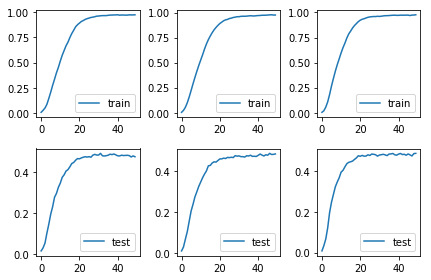

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 3, 1)
plt.plot(training_runs[0].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 2)
plt.plot(training_runs[1].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 3)
plt.plot(training_runs[2].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 4)
plt.plot(training_runs[0].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 5)
plt.plot(training_runs[1].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 6)
plt.plot(training_runs[2].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.tight_layout() 

plt.show()



Text(0.5,1,'Training and Validation Accuracy')

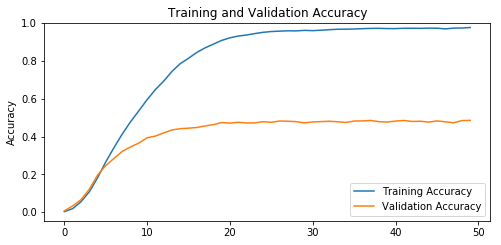

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
# plt.title('Training and Validation Loss')
# plt.xlabel('epoch')
# plt.show()

In [28]:
print("Average training accuracy: {}".format(np.mean([training_runs[0].history['acc'][-1], 
                                                     training_runs[1].history['acc'][-1], training_runs[2].history['acc'][-1]])))
print("Average testing accuracy: {}".format(np.mean([training_runs[0].history['val_acc'][-1], 
                                                     training_runs[1].history['val_acc'][-1], training_runs[2].history['val_acc'][-1]])))

Average training accuracy: 0.9761209067970039
Average testing accuracy: 0.48223341729939234


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# **New Section**